## TEXT CLASSIFICATION

### Prepare

In [699]:
# Import library python

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [700]:
import requests
import random
import re

In [701]:
# Check GPU

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [702]:
# Add helper function

# url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
# response = requests.get(url)
# with open("helper_functions.py", "wb") as file:
#     file.write(response.content)
# print("'helper_functions.py'")

In [703]:
# Import series of helper functions for the notebook

from helper_functions import create_tensorboard_callback, plot_loss_curves

### Visualize data

In [704]:
df_data = pd.read_csv('Tweets.csv')
df_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### encode

In [705]:
#Encoding Categorical to Numeric 

label_encode={"airline_sentiment": {"negative":0,"neutral" :1,"positive":2}}
df_data=df_data.replace(label_encode)

#### cleansing text

In [706]:
def cleansing(df_data):
    df_clean = df_data.str.lower()
    df_clean = [re.sub(r'[^\w\s]', '', i) for i in df_clean]
    df_clean = [re.sub(r'http\S+|www\S+|pic.twitter.com\S+|\S+.com\S+', '', i) for i in df_clean]
    df_clean = [re.sub(r'\s+', ' ', i) for i in df_clean]
    return df_clean

In [707]:
df_data['clean_text'] = cleansing(df_data['text'])
df_data.drop('text', axis=1, inplace=True)
df_data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),virginamerica what dhepburn said
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),virginamerica plus youve to the experience tacky
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),virginamerica i didnt today must mean i need t...
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),virginamerica its really aggressive to blast o...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),virginamerica and its a really big bad thing a...


#### shuffled

In [708]:
# Shuffle training dataframe
# shuffle with random_state=42 for reproducibility

df_shuffled = df_data.sample(frac=1, random_state=42)
df_data = df_shuffled 
df_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
4794,569731104070115329,2,1.0000,NaN,NaN,Southwest,NaN,JasmineDT,NaN,1,NaN,2015-02-22 21:30:54 -0800,Washington D.C.,Eastern Time (US & Canada),southwestair youre my early frontrunner for be...
10480,569263373092823040,0,1.0000,Cancelled Flight,1.0000,US Airways,NaN,ElizabethFrayer,NaN,0,NaN,2015-02-21 14:32:19 -0800,NaN,NaN,usairways how is it that my flt to ewr was can...
8067,568818669024907264,0,1.0000,Late Flight,0.6770,Delta,NaN,The_Radifier,NaN,0,NaN,2015-02-20 09:05:13 -0800,"Arlington, VA",Atlantic Time (Canada),jetblue what is going on with your bdl to dca ...
8880,567775864679456768,1,1.0000,NaN,NaN,Delta,NaN,rnlewisjr,NaN,0,NaN,2015-02-17 12:01:29 -0800,"iPhone: 60.495510,-151.064590",Alaska,jetblue do they have to depart from washington dc
8292,568526521910079488,0,0.6625,Customer Service Issue,0.3394,Delta,NaN,beantoon,NaN,0,NaN,2015-02-19 13:44:20 -0800,"Plymouth, MA",NaN,jetblue i can probably find some of them are t...


#### labels

In [709]:
# Check unique 'airline_sentiment'

unique_sentiments = df_data['airline_sentiment'].unique()
print(unique_sentiments)

[2 0 1]


In [710]:
# examples of each class

df_data.airline_sentiment.value_counts()

airline_sentiment
0    9178
1    3099
2    2363
Name: count, dtype: int64

In [711]:
# samples total

print(f"Total samples: {len(df_data)}")

Total samples: 14640


In [712]:
# visualize some random training examples
# create random indexes not higher than the total number of samples

random_index = random.randint(0, len(df_data)-3) 
for row in df_shuffled[["clean_text", "airline_sentiment"]].iloc[random_index:random_index+3].itertuples():
    _, clean_text, airline_sentiment = row
    sentiment_label = "(negatif)" if airline_sentiment == 0 else "(neutral)" if airline_sentiment == 1 else "(positive)"
    
    print(f"Target: {airline_sentiment} {sentiment_label}")
    print(f"clean_text:\n{clean_text}\n")
    print("---\n")

Target: 1 (neutral)
clean_text:
americanair do you happen to know if that plane will be repainted or fly off into the sunset

---

Target: 1 (neutral)
clean_text:
americanair please help us get home tomorrow

---

Target: 0 (negatif)
clean_text:
united fingers crossed amp its all intact very disappointed with this experience as before this we were actually saying we enjoyed using you

---



### Split test

In [713]:
from sklearn.model_selection import train_test_split

In [714]:
x_train, x_test, y_train, y_test = train_test_split(df_shuffled['clean_text'].to_numpy(),df_shuffled['airline_sentiment'].to_numpy(),
    test_size=0.2,
    random_state=42,
    stratify=df_shuffled['airline_sentiment']
)

In [715]:
# Check the lengths

len(x_train), len(x_test), len(y_train), len(y_test)

(11712, 2928, 11712, 2928)

In [716]:
# View the sample training sentences and their labels

x_train[:3], y_train[:3]

(array(['united when will you have special promotions for flights departing newark nj to st johns antigua',
        'americanair about when can i see a new american airlines credit card to replace my usairways dividend mastercard',
        'united the people at the counter have been very helpful as you can see nobody is there flight to austin 1055 and still sitting here'],
       dtype=object),
 array([1, 1, 0], dtype=int64))

#### Text vectorization (tokenization)


In [717]:
from tensorflow.keras.layers import TextVectorization

# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words in vocabulary
max_length = 50 # max length 

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [718]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in x_train])/len(x_train))

17

In [719]:
# Fit the text vectorizer to the training text

text_vectorizer.adapt(x_train)

In [720]:
# Create sample sentence and tokenize it

sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[ 482,    5,    1,   16,   12, 1234,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)>

In [721]:
# Choose a random sentence from the training dataset and tokenize it

random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
united amp finally he was told he couldnt use the front of plane restrm he was row7 though myselfothers in rows behind him used wno issue      

Vectorized version:


<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[   6,   59,  287,  270,   24,  146,  270,  322,  254,    3,  870,
          19,   65, 7611,  270,   24, 7508,  375, 8618,   16, 1527,  928,
         522,  491, 3166,  251,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)>

In [722]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'to', 'the', 'i']
Bottom 5 least common words: ['getyourlife', 'getyouracttogether', 'gettingoffplane', 'gettingimpatient', 'gettingbetter']


#### Creating an Embedding using an Embedding Layer

In [723]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding") 

embedding

In [724]:
# Get a random sentence from training set

random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
jetblue unfortunately no but hoping i can catch one sometime in the near future      

Embedded version:


<tf.Tensor: shape=(1, 50, 128), dtype=float32, numpy=
array([[[-0.02048783,  0.0068352 ,  0.02710411, ..., -0.0267056 ,
         -0.01881511, -0.02897559],
        [ 0.01710593,  0.04546552, -0.01785681, ...,  0.00816858,
          0.02403829, -0.02414705],
        [ 0.04260324,  0.01541514, -0.01266507, ..., -0.01592636,
         -0.01432161, -0.00644115],
        ...,
        [ 0.00851464,  0.04728678,  0.04035637, ...,  0.02437386,
         -0.03555293,  0.01081607],
        [ 0.00851464,  0.04728678,  0.04035637, ...,  0.02437386,
         -0.03555293,  0.01081607],
        [ 0.00851464,  0.04728678,  0.04035637, ...,  0.02437386,
         -0.03555293,  0.01081607]]], dtype=float32)>

In [725]:
# Check out a single token's embedding

sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-2.04878338e-02,  6.83519989e-03,  2.71041133e-02,  2.59884484e-02,
        4.55758013e-02, -3.34402323e-02,  2.17909478e-02,  1.48013495e-02,
        3.59011814e-03,  4.36664745e-03,  1.79292597e-02, -3.52296457e-02,
        1.92313530e-02,  3.72726806e-02,  3.07117365e-02, -2.44505648e-02,
       -4.08100970e-02, -1.45572200e-02,  1.36914290e-02,  9.91985947e-03,
        1.98727958e-02,  9.63522121e-03,  4.84780706e-02, -2.02134848e-02,
        3.15289982e-02, -2.52976660e-02,  3.13499682e-02,  8.74564797e-03,
       -2.35851854e-03,  2.19667666e-02,  3.84691842e-02, -4.40165661e-02,
        6.23104721e-03, -3.12142856e-02,  4.13691066e-02, -1.04375370e-02,
       -2.70416141e-02,  2.60214545e-02, -9.48891789e-03, -4.80411537e-02,
       -3.22206840e-02,  1.03416070e-02,  2.14910395e-02, -2.28145253e-02,
       -6.31452724e-03,  4.54590060e-02, -2.40924116e-02, -1.97240114e-02,
       -1.76220015e-03, -2.67732870e-02,  3.82537954

### GRU model

Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

In [726]:
# Set random seed and embedding layer
tf.random.set_seed(42)

from tensorflow.keras import layers

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)

# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 

# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(3, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs, name="model_GRU")

In [727]:
# Compile GRU model
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [728]:
# Get a summary of the GRU model
model.summary()

Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_20 (Text  (None, 50)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 50, 128)           1280000   
                                                                 
 gru_20 (GRU)                (None, 64)                37248     
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,317,443
Trainable params: 1,317,443
Non-trainable params: 0
_______________________________________________

In [729]:
# Create ModelCheckpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "./best_model.GRU"
model_checkpoint = ModelCheckpoint(checkpoint_path, 
                                   monitor='val_accuracy', 
                                   save_best_only=True, 
                                   mode='max', 
                                   verbose=1)


In [730]:
# Fit model
SAVE_DIR = "./logs"
model_history = model.fit(x_train,
                          y_train,
                          epochs=5,
                          validation_data=(x_test, y_test),
                          callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU_model"), model_checkpoint])

Saving TensorBoard log files to: ./logs/GRU_model/20240201-113354
Epoch 1/5


366/366 [==============================] - ETA: 0s - loss: 0.9230 - accuracy: 0.6252
Epoch 1: val_accuracy improved from -inf to 0.62671, saving model to .\best_model.GRU


INFO:tensorflow:Assets written to: .\best_model.GRU\assets


INFO:tensorflow:Assets written to: .\best_model.GRU\assets


366/366 [==============================] - 8s 18ms/step - loss: 0.9230 - accuracy: 0.6252 - val_loss: 0.9222 - val_accuracy: 0.6267
Epoch 2/5
366/366 [==============================] - ETA: 0s - loss: 0.9176 - accuracy: 0.6270
Epoch 2: val_accuracy did not improve from 0.62671
366/366 [==============================] - 3s 9ms/step - loss: 0.9176 - accuracy: 0.6270 - val_loss: 0.9120 - val_accuracy: 0.6267
Epoch 3/5
360/366 [============================>.] - ETA: 0s - loss: 0.6423 - accuracy: 0.7339
Epoch 3: val_accuracy improved from 0.62671 to 0.78484, saving model to .\best_model.GRU


INFO:tensorflow:Assets written to: .\best_model.GRU\assets


INFO:tensorflow:Assets written to: .\best_model.GRU\assets


366/366 [==============================] - 6s 16ms/step - loss: 0.6415 - accuracy: 0.7344 - val_loss: 0.5467 - val_accuracy: 0.7848
Epoch 4/5
366/366 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.8440
Epoch 4: val_accuracy improved from 0.78484 to 0.80635, saving model to .\best_model.GRU


INFO:tensorflow:Assets written to: .\best_model.GRU\assets


INFO:tensorflow:Assets written to: .\best_model.GRU\assets


366/366 [==============================] - 6s 18ms/step - loss: 0.4134 - accuracy: 0.8440 - val_loss: 0.5177 - val_accuracy: 0.8064
Epoch 5/5
360/366 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.9079
Epoch 5: val_accuracy did not improve from 0.80635
366/366 [==============================] - 3s 9ms/step - loss: 0.2642 - accuracy: 0.9071 - val_loss: 0.5654 - val_accuracy: 0.7988


<font size="3">Due to the optimized default settings of the GRU cell in TensorFlow, training doesn't take long at all.</font>

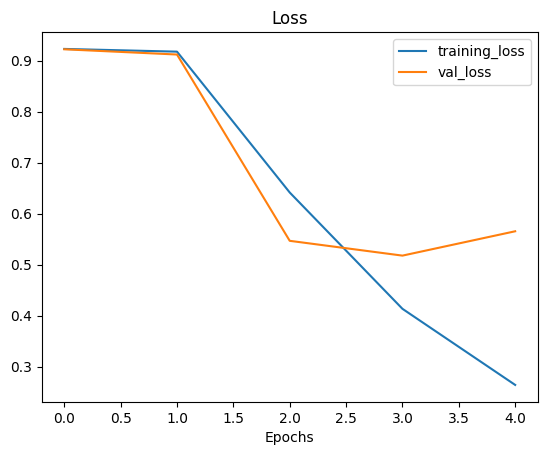

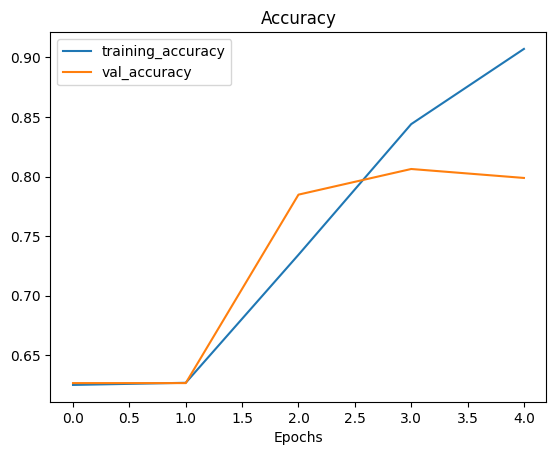

In [731]:
plot_loss_curves(model_history)
plt.show()

In [732]:
# Make predictions on the validation data

model_pred_probs = model.predict(x_test)
model_pred_probs.shape, model_pred_probs[:10]

92/92 [==============================] - 1s 4ms/step


((2928, 3),
 array([[3.5929140e-01, 6.0607469e-01, 3.4633826e-02],
        [6.4137526e-02, 7.9646267e-02, 8.5621619e-01],
        [9.9285156e-01, 5.2542104e-03, 1.8941631e-03],
        [2.9618639e-01, 6.4546728e-01, 5.8346294e-02],
        [9.5066446e-01, 2.7177757e-02, 2.2157829e-02],
        [9.7467256e-01, 1.8668097e-02, 6.6593084e-03],
        [1.0795727e-01, 8.1542200e-01, 7.6620817e-02],
        [8.1048137e-01, 1.6287622e-01, 2.6642401e-02],
        [9.9899131e-01, 7.3480472e-04, 2.7388378e-04],
        [9.8179919e-01, 1.5228244e-02, 2.9726089e-03]], dtype=float32))

In [733]:
# Convert prediction probabilities to prediction classes

model_preds = tf.squeeze(tf.round(model_pred_probs))
model_preds[:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

### Evaluate model GRU

In [734]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):

    # Convert one-hot encoded labels to class labels
    y_true_classes = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else y_true
    y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred

    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true_classes, y_pred_classes) * 100
    
    # Calculate model precision, recall, and f1 score using "weighted average"
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [735]:
model_results = calculate_results(y_true=y_test, y_pred=model_preds)
model_results

{'accuracy': 79.78142076502732,
 'precision': 0.7893364330606242,
 'recall': 0.7978142076502732,
 'f1': 0.7882463459524043}

In [736]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("./best_model.GRU")

# Evaluate the best model on the test data
evaluation_results = best_model.evaluate(x_test, y_test)

# Print the evaluation results
print("Test Accuracy:", evaluation_results[1])
print("Test Loss:", evaluation_results[0])

92/92 [==============================] - 1s 6ms/step - loss: 0.5177 - accuracy: 0.8064
Test Accuracy: 0.806352436542511
Test Loss: 0.517694354057312


### BERT model